# Analize

## Step 1: Import Dependencies

In [1073]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 : Load Dataset

In [1074]:
ratings_path = "/home/mohammad/Documents/PROJECTS/Movielo/data/ml-latest-small/ratings.csv"
ratings = pd.read_csv(ratings_path)

In [1075]:
movies_path = "/home/mohammad/Documents/PROJECTS/Movielo/data/ml-latest-small/movies.csv"
movies = pd.read_csv(movies_path)

## Step 3 : Exploratory Data Analysis

In [1076]:
n_ratings = len(ratings)
n_movies = ratings["movieId"].nunique()
n_users = ratings["userId"].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's :{n_movies}")
print(f"Number of unique movieId's :{n_users}")
print(f"Average number of ratings per user : {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie : {round(n_ratings/n_movies, 2)}")

Number of ratings: 100836
Number of unique movieId's :9724
Number of unique movieId's :610
Average number of ratings per user : 165.3
Average number of ratings per movie : 10.37


What is the distribution of movie ratings?

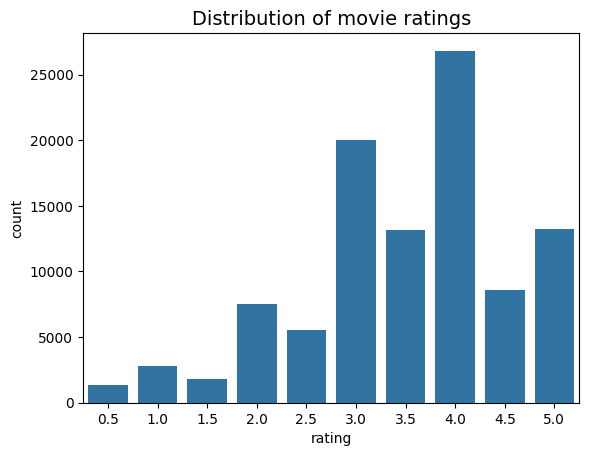

In [1077]:
sns.countplot(x="rating", data=ratings)
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

In [1078]:
mean_global_ratings = ratings["rating"].mean()
print(f"Mean global rating: {round(mean_global_ratings, 2)}")

Mean global rating: 3.5


In [1079]:
mean_rating_user = ratings.groupby("userId")["rating"].mean()
print(f"Mean rating per user : {round(mean_rating_user.mean(), 2)}")

Mean rating per user : 3.66


which movies are most frequently rated?

In [1080]:
movie_ratings = ratings.merge(movies, on="movieId").sort_values(by="movieId")
movie_ratings["title"].value_counts()[:10]


title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64

What are the lowest and highest rated movies?

In [1081]:
mean_ratings = ratings.groupby("movieId")[["rating"]].mean()
lowest_rated = mean_ratings["rating"].idxmin()
movies[movies["movieId"] == lowest_rated]

,movieId,title,genres
2689,3604,Gypsy (1962),Musical


In [1082]:
highest_rated = mean_ratings["rating"].idxmax()
movies[movies["movieId"] == highest_rated]

,movieId,title,genres
48,53,Lamerica (1994),Adventure|Drama


In [1083]:
ratings[ratings["movieId"] == highest_rated]

,userId,movieId,rating,timestamp
13368,85,53,5.0,889468268
96115,603,53,5.0,963180003


# Description of Bayesian Average
The Bayesian average is a statistical method used to estimate the mean of a set of data that incorporates prior knowledge or beliefs about the data. This approach is particularly useful in situations where data sets are small or where certain values are overrepresented, helping to mitigate the effect of outliers and providing a more balanced estimation.

1. ## Prior Information:

- Bayesian average incorporates prior beliefs or knowledge about the data, which is usually represented as a prior distribution.
- The prior distribution reflects what is known about the parameter before observing the data.

2. Likelihood:

- The likelihood is the probability of the observed data given a particular value of the parameter.
- It represents the information gained from the actual observed data.

3. Posterior Distribution:

- he combination of prior distribution and likelihood yields the posterior distribution.
- The posterior distribution represents the updated beliefs about the parameter after considering the observed data.

4. Formula:

 ![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/06/bayesianParameter.jpg.jpg)

In [1084]:
movies_state = ratings.groupby("movieId")["rating"].agg(["count", "mean"])


In [1085]:
c = movies_state["count"].mean()
m = movies_state["mean"].mean()

print(f"Average number of ratings for a given movies: {c:.2f}")
print(f"Average ratings for a given movie: {m:.2f}")

def bayesian_avg(ratings):
    bayesian_avg = (c*m+ratings.sum())/(c+ratings.count())
    return round(bayesian_avg, 3)

Average number of ratings for a given movies: 10.37
Average ratings for a given movie: 3.26


In [1086]:
bayesian_avg_ratings = ratings.groupby("movieId")["rating"].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ["movieId", "bayesians_avg"]
movie_stats = movies_state.merge(bayesian_avg_ratings, on="movieId")


In [1087]:
movie_stats = movie_stats.merge(movies[["movieId", "title"]])
movie_stats.sort_values(by="bayesians_avg", ascending=False)

,movieId,count,mean,bayesians_avg,title
277,318,317,4.429022,4.392,"Shawshank Redemption, The (1994)"
659,858,192,4.289062,4.236,"Godfather, The (1972)"
2224,2959,218,4.272936,4.227,Fight Club (1999)
224,260,251,4.231076,4.193,Star Wars: Episode IV - A New Hope (1977)
46,50,204,4.237745,4.191,"Usual Suspects, The (1995)"
...,...,...,...,...,...
1988,2643,16,1.687500,2.307,Superman IV: The Quest for Peace (1987)
1144,1499,27,1.925926,2.297,Anaconda (1997)
1372,1882,33,1.954545,2.267,Godzilla (1998)
2679,3593,19,1.657895,2.224,Battlefield Earth (2000)


In [1088]:
movie_stats.sort_values(by="bayesians_avg", ascending=True)

,movieId,count,mean,bayesians_avg,title
1172,1556,19,1.605263,2.190,Speed 2: Cruise Control (1997)
2679,3593,19,1.657895,2.224,Battlefield Earth (2000)
1372,1882,33,1.954545,2.267,Godzilla (1998)
1144,1499,27,1.925926,2.297,Anaconda (1997)
1988,2643,16,1.687500,2.307,Superman IV: The Quest for Peace (1987)
...,...,...,...,...,...
46,50,204,4.237745,4.191,"Usual Suspects, The (1995)"
224,260,251,4.231076,4.193,Star Wars: Episode IV - A New Hope (1977)
2224,2959,218,4.272936,4.227,Fight Club (1999)
659,858,192,4.289062,4.236,"Godfather, The (1972)"


In [1089]:
movies["genres"] = movies["genres"].apply(lambda x:x.split("|"))


### How meny mvoie geners are there?

In [1090]:
from collections import Counter
genre_frequancy = Counter(g for genres in movies["genres"] for g in genres)
print(f"There are {len(genre_frequancy)} genres.")
genre_frequancy

There are 20 genres.


Counter({'Drama': 4361,
         'Comedy': 3756,
         'Thriller': 1894,
         'Action': 1828,
         'Romance': 1596,
         'Adventure': 1263,
         'Crime': 1199,
         'Sci-Fi': 980,
         'Horror': 978,
         'Fantasy': 779,
         'Children': 664,
         'Animation': 611,
         'Mystery': 573,
         'Documentary': 440,
         'War': 382,
         'Musical': 334,
         'Western': 167,
         'IMAX': 158,
         'Film-Noir': 87,
         '(no genres listed)': 34})

In [1091]:
print(f"The 5 most commen genres:\n", genre_frequancy.most_common(5))

The 5 most commen genres:
 [('Drama', 4361), ('Comedy', 3756), ('Thriller', 1894), ('Action', 1828), ('Romance', 1596)]


/tmp/ipykernel_28495/2768090804.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="genres", y="count", data=genre_frequancy_df, palette="viridis")


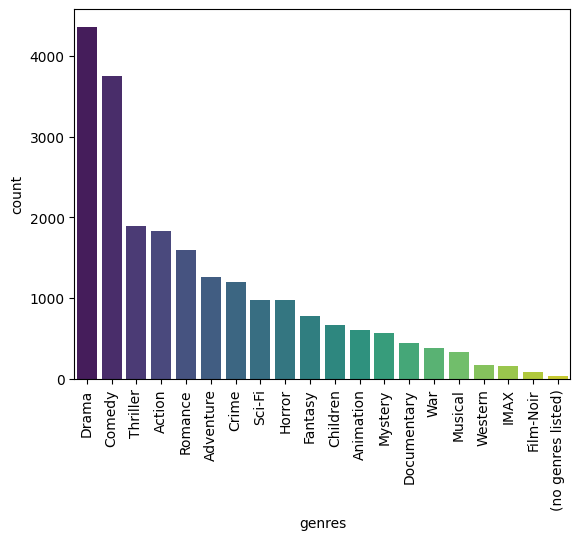

In [1092]:
genre_frequancy_df = pd.DataFrame([genre_frequancy]).T.reset_index()
genre_frequancy_df.columns = ["genres", "count"]
genre_frequancy_df.sort_values(by="count", ascending=False, inplace=True)

sns.barplot(x="genres", y="count", data=genre_frequancy_df, palette="viridis")
plt.xticks(rotation=90)
plt.show()

In [1093]:
def release_year(x: str):
    try:
        title = " ".join(x.split(" ")[:-1])
        year_string = int(x.strip().split(" ")[-1][1:-1])
    except:
        year_string = np.nan
    return year_string, title

In [1094]:
movies["release_year"] = movies["title"].apply(lambda x: release_year(x)[0])
movies["title"] = movies["title"].apply(lambda x: release_year(x)[1])
movies.sort_values(by="release_year",ascending=False).reset_index(drop="index").dropna()

,movieId,title,genres,release_year
0,183295,Insidious: The Last Key,"[Horror, Mystery, Thriller]",2018.0
1,184987,A Wrinkle in Time,"[Adventure, Children, Fantasy, Sci-Fi]",2018.0
2,187717,Won't You Be My Neighbor?,[Documentary],2018.0
3,187595,Solo: A Star Wars Story,"[Action, Adventure, Children, Sci-Fi]",2018.0
4,187593,Deadpool 2,"[Action, Comedy, Sci-Fi]",2018.0
...,...,...,...,...
9724,102747,"Rink, The",[Comedy],1916.0
9725,7065,"Birth of a Nation, The","[Drama, War]",1915.0
9726,140541,The Electric Hotel,"[Animation, Comedy, Sci-Fi]",1908.0
9727,49389,The Great Train Robbery,"[Crime, Western]",1903.0


In [1095]:
df = pd.merge(ratings, movies, how="inner")
groupby_data = df.groupby(["release_year", "rating"]).size().unstack(fill_value=0)

In [1096]:
highest_rating_in_release_year = groupby_data.idxmax()
lowest_rating_in_release_year = groupby_data.idxmin()

<Figure size 1200x600 with 0 Axes>

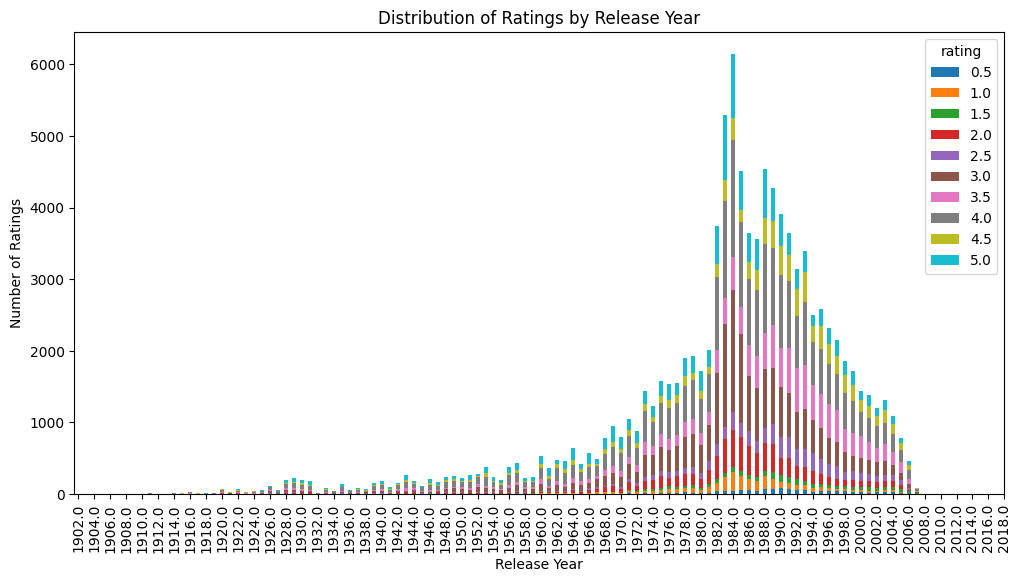

In [1097]:
plt.figure(figsize=(12, 6))
groupby_data.plot(kind='bar', stacked=True, figsize=(12, 6))

# Setting x-axis ticks to every 2 years
years = np.arange(df['release_year'].min(), df['release_year'].max() + 1, 2)
plt.xticks(years - df['release_year'].min(), years)

plt.title('Distribution of Ratings by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Ratings')
plt.show()

# Step 4 : Data Pre-processing


In [1098]:
from scipy.sparse import csr_matrix 

def create_x(df):
    """Generates a sparse matrix from ratings dataframe

    Args:
        df (pd.DatatFrame): pandas dataframe containing 3 columns (userId, movieId, rating)

    Returns:
        X: sparse matrix
        user_mapper: dict that mape user id's to user indices
        user_inv_mapper: dict that mape user indices to user id's 
        movie_mapper: dict that mape movie id's to movie indices
        movie_inv_mapper: dict that mape movie indices to movie id's
    """

    M = df["userId"].nunique()
    N = df["movieId"].nunique()

    user_mapper = dict(zip(df["userId"].unique(), list(range(M))))
    movie_mapper = dict(zip(df["movieId"].unique(), list(range(N))))

    user_inv_mapper = dict(zip(list(range(M)), df["userId"].unique()))
    movie_inv_mapper = dict(zip(list(range(N)), df["movieId"].unique()))

    user_index = [user_mapper[i] for i in df["userId"]]
    movie_index = [movie_mapper[i] for i in df["movieId"]]

    X = csr_matrix((df["rating"], (user_index, movie_index)), shape=(M, N))

    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

x, user_mapper, movie_mapper, ususer_inv_mappere, movie_inv_mapper = create_x(ratings)



In [1099]:
x.shape

(610, 9724)

**Evaluating sparsity**

In [1100]:
n_total = x.shape[0]*x.shape[1]
n_ratings = x.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity : {round(sparsity*100, 2)}%")

Matrix sparsity : 1.7%


In [1101]:
n_ratings_per_user = x.getnnz(axis=1)
len(n_ratings_per_user)

610

In [1102]:
print(f"Most active user rated {n_ratings_per_user.max()} movies.")
print(f"Least active user rated {n_ratings_per_user.min()} movies.")

Most active user rated 2698 movies.
Least active user rated 20 movies.


In [1103]:
n_ratings_per_movie = x.getnnz(axis=0)
len(n_ratings_per_movie)

9724

In [1104]:
print(f"Most active  mvoie rated {n_ratings_per_movie.max()} ratings.")
print(f"Least active mvoie rated {n_ratings_per_movie.min()} ratings.")

Most active  mvoie rated 329 ratings.
Least active mvoie rated 1 ratings.


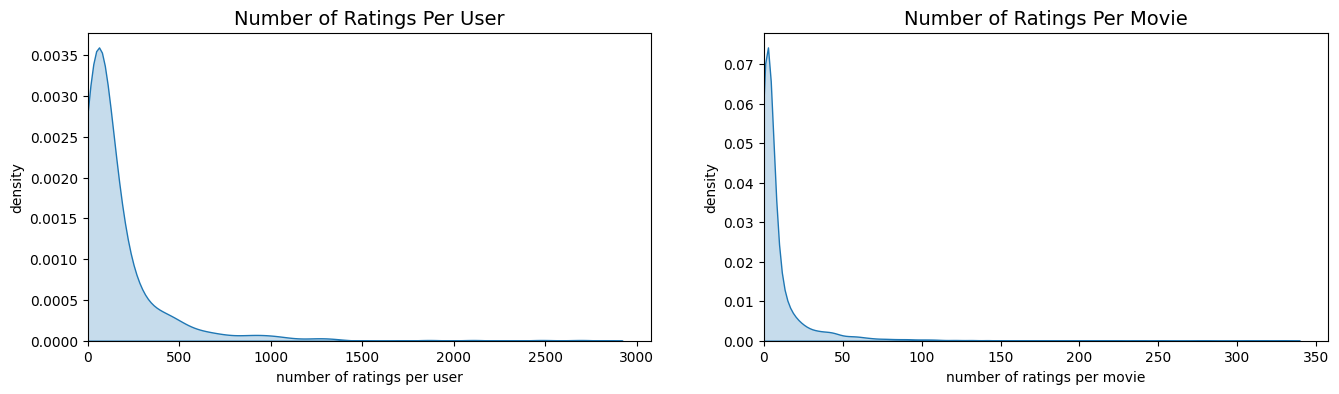

In [1105]:
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, fill=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_movie, fill=True)
plt.xlim(0)
plt.title("Number of Ratings Per Movie", fontsize=14)
plt.xlabel("number of ratings per movie")
plt.ylabel("density")
plt.show()

# Step 5 : Item-Item Recommendation with k-Nearest Neighbors

In [1106]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric="cosine"):
    """Finds k-nearest neighbours for a given movie id.

    Args:
        movie_id (int): id of the movie of interest
        X (np.array): user-item utility matrix
        k (int): number of similar movies to retrieve 
        metric (str, optional): distance metric for KNN calculation. Defaults to "cosine".
    
    output : return list of k similar movies ID's
    """
    X = X.T
    neighbour_ids = []

    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1, -1)

    KNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    KNN.fit(X)
    neighbour = KNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0, k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)

    return neighbour_ids


In [1107]:
movie_titles = dict(zip(movies["movieId"], movies["title"]))
k =10
movie_id = 1
similar_movies = find_similar_movies(movie_id, x, movie_mapper, movie_inv_mapper, k=k)
movie_title = movie_titles[movie_id]

print(f"Because your watched '{movie_title}'")
for i in similar_movies:
    print(movie_titles[i])

Because your watched 'Toy Story'
Toy Story 2
Jurassic Park
Independence Day (a.k.a. ID4)
Star Wars: Episode IV - A New Hope
Forrest Gump
Lion King, The
Star Wars: Episode VI - Return of the Jedi
Mission: Impossible
Groundhog Day


In [1108]:
movie_titles = dict(zip(movies["movieId"], movies["title"]))
k =10
movie_id = 1
similar_movies = find_similar_movies(movie_id, x, movie_mapper, movie_inv_mapper, metric="euclidean",k=k )
movie_title = movie_titles[movie_id]

print(f"Because your watched '{movie_title}'")
for i in similar_movies:
    print(movie_titles[i])

Because your watched 'Toy Story'
Toy Story 2
Mission: Impossible
Independence Day (a.k.a. ID4)
Bug's Life, A
Nutty Professor, The
Willy Wonka & the Chocolate Factory
Babe
Groundhog Day
Mask, The


# Step : Handeling the cold-start problem

In [1123]:
genres = set(g for G in movies["genres"] for g in G)

for g in genres:
    movies[g] = movies.genres.transform(lambda x: int(g in x))


movie_genres = movies.drop(columns=['genres'])

In [1128]:
merged_moviegene_and_rating = pd.merge(movie_genres, ratings, how="inner")
merged_moviegene_and_rating.head()

,movieId,title,release_year,Crime,Fantasy,Action,Film-Noir,(no genres listed),Drama,War,...,Western,Documentary,Children,Mystery,Musical,Sci-Fi,IMAX,userId,rating,timestamp
0,1,Toy Story,1995.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,4.0,964982703
1,1,Toy Story,1995.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,5,4.0,847434962
2,1,Toy Story,1995.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,7,4.5,1106635946
3,1,Toy Story,1995.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,15,2.5,1510577970
4,1,Toy Story,1995.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,17,4.5,1305696483


In [1145]:
merged_moviegene_and_rating.groupby(["title","rating"]).size().unstack(fill_value=0).idxmax()

rating
0.5    Austin Powers: The Spy Who Shagged Me
1.0          Dumb & Dumber (Dumb and Dumber)
1.5                    Dude, Where's My Car?
2.0               Ace Ventura: Pet Detective
2.5          Dumb & Dumber (Dumb and Dumber)
3.0                                   Batman
3.5            Independence Day (a.k.a. ID4)
4.0                            Jurassic Park
4.5                               Fight Club
5.0                Shawshank Redemption, The
dtype: object

**cosine_similarity**  

measures the similarity between two vectors of an inner product space.


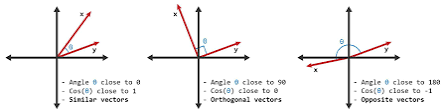


In [1111]:
from sklearn.metrics.pairwise import cosine_similarity

consine_sim = cosine_similarity(movie_genres, movie_genres)

In [1112]:
from fuzzywuzzy import process

def movie_finder(title):
    all_titles = movies["title"].tolist()
    closest_match = process.extractOne(title, all_titles)
    return closest_match[0]

In [1113]:
name = "Return to Oz"
title = movie_finder(name)
title

'Return to Oz'

In [1114]:
movie_idx = dict(zip(movies["title"], list(movies.index)))
idx = movie_idx[title]
print(f"Movie index for {name}: {idx}")

Movie index for Return to Oz: 1556


In [1115]:
n_recommendation = 10
sim_scores = list(enumerate(consine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(n_recommendation+1)]
sim_scores

[(53, np.float64(1.0000000000000002)),
 (109, np.float64(1.0000000000000002)),
 (767, np.float64(1.0000000000000002)),
 (1514, np.float64(1.0000000000000002)),
 (1556, np.float64(1.0000000000000002)),
 (1617, np.float64(1.0000000000000002)),
 (1618, np.float64(1.0000000000000002)),
 (1799, np.float64(1.0000000000000002)),
 (3574, np.float64(1.0000000000000002)),
 (6075, np.float64(1.0000000000000002))]

In [1116]:
similar_movies = [i[0] for i in sim_scores]
similar_movies

[53, 109, 767, 1514, 1556, 1617, 1618, 1799, 3574, 6075]

In [1117]:
print(f"Because you watched {title}")
movies["title"].iloc[similar_movies]

Because you watched Return to Oz


53                            Indian in the Cupboard, The
109                            NeverEnding Story III, The
767                              Escape to Witch Mountain
1514                   Darby O'Gill and the Little People
1556                                         Return to Oz
1617                               NeverEnding Story, The
1618          NeverEnding Story II: The Next Chapter, The
1799                               Santa Claus: The Movie
3574    Harry Potter and the Sorcerer's Stone (a.k.a. ...
6075    Chronicles of Narnia: The Lion, the Witch and ...
Name: title, dtype: object

In [1118]:
def get_content_based_recommedation(title_string:str, n_recommendation: int = 10):
    title = movie_finder(title_string)
    idx = movie_idx[title]
    sim_scores = list(enumerate(consine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(n_recommendation+1)]
    similar_movies = [i[0] for i in sim_scores]
    print(f"Because you watched {title}")
    print(movies["title"].iloc[similar_movies])

In [1119]:
get_content_based_recommedation("toy story", 5)

Because you watched Toy Story
1706                                       Antz
2355                                Toy Story 2
2809    Adventures of Rocky and Bullwinkle, The
3000                  Emperor's New Groove, The
3568                             Monsters, Inc.
Name: title, dtype: object


# Step 7 : Dimensionality Reduction with matrix factorization

In [1120]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20 , n_iter=10)
Q = svd.fit_transform(x.T)
Q.shape

(9724, 20)

In [1121]:
movie_id = 1
similar_movies = find_similar_movies(movie_id, Q.T, movie_mapper, movie_inv_mapper, metric="cosine",k=k )
movie_title = movie_titles[movie_id]

print(f"Because your watched '{movie_title}'")
for i in similar_movies:
    print(movie_titles[i])

Because your watched 'Toy Story'
Home Alone
Jurassic Park
Aladdin
Willy Wonka & the Chocolate Factory
Back to the Future
Forrest Gump
Groundhog Day
Star Wars: Episode IV - A New Hope
Princess Bride, The
